<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [5]:
%%time
# change the path if needed
path = '../../data/2008.csv'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

**Check the number of rows and columns and print column names.**

In [6]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [7]:
#flights_df.head()
#flights_df[flights_df['CancellationCode'] != 'NaN']['CancellationCode'].head()
flights_df['CancellationCode'] = flights_df['CancellationCode'].astype(str)

**Transpose the frame to see all features at once.**

In [8]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [9]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [11]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [12]:
flights_df['UniqueCarrier'].nunique()

20

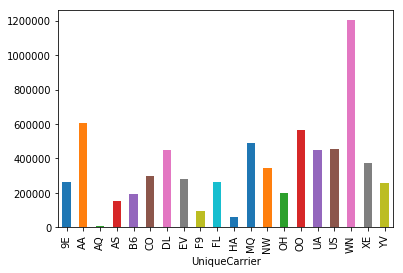

In [13]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [14]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [15]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="3" halign="left">Distance</th>
      <th>Cancelled</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>sum</th>
      <th>count</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>UniqueCarrier</th>
      <th>FlightNum</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">CO</th>
      <th>15</th>
      <td>4962.000000</td>
      <td>1796244.0</td>
      <td>362</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14</th>
      <td>4962.000000</td>
      <td>1796244.0</td>
      <td>362</td>
      <td>0</td>
    </tr>
    <tr>
      <th>UA</th>
      <th>52</th>
      <td>2465.181818</td>
      <td>1789722.0</td>
      <td>726</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
</div>

**Number of flights by days of week and months:**

In [ ]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

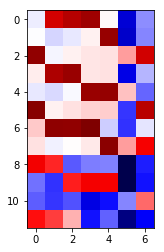

In [16]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

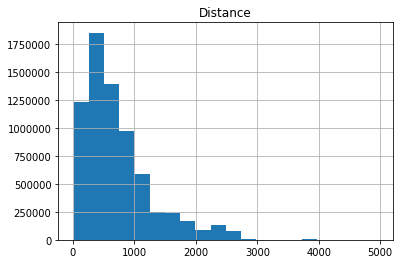

In [ ]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [ ]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [ ]:
num_flights_by_date = flights_df.groupby('Date').size()

In [ ]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

In [ ]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [8]:
pp = pd.crosstab(flights_df['UniqueCarrier'], flights_df['Cancelled'])

In [9]:
psorted = pp[1].sort_values(ascending=False)
psorted[:10]

UniqueCarrier
MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
Name: 1, dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

Weather conditions


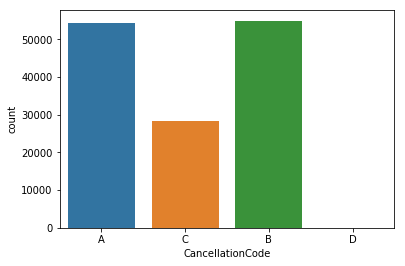

In [17]:
pp = flights_df[flights_df['CancellationCode'] != 'nan']
sns.countplot(x='CancellationCode', data=pp)
cancell_reasons = {'A' : 'Carrier', 'B': 'Weather conditions', 'C': 'National Air System', 'D': 'Security reasons'}
print(cancell_reasons[pp.groupby('CancellationCode').size().sort_values(ascending=False).index[0]])
#!!!print(pp['CancellationCode'].mode())

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [18]:
flights_df.groupby(['Origin', 'Dest']).size().idxmax()

#!!! flights_df['Route'] = flights_df['Origin'] + '->' + flights_df['Dest']
#!!! flights_df['Route'].value_counts().head()
#!!! flights_df[['Origin','Dest']].groupby(['Origin','Dest']).size().idxmax()

('SFO', 'LAX')

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [ ]:
delayColumns = flights_df.columns[flights_df.columns.str.contains('Delay')]

delayed_df = flights_df[flights_df['DepDelay'] > 0]
delayed_df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)[:5]
top5delayed_df = delayed_df[ (delayed_df['WeatherDelay'] > 0) &
                        (
                                ((delayed_df['Origin'] == 'LAX') & (delayed_df['Dest'] == 'SFO')) |
                                ((delayed_df['Origin'] == 'DAL') & (delayed_df['Dest'] == 'HOU')) |
                                ((delayed_df['Origin'] == 'HOU') & (delayed_df['Dest'] == 'DAL')) |
                                ((delayed_df['Origin'] == 'ORD') & (delayed_df['Dest'] == 'LGA')) |
                                ((delayed_df['Origin'] == 'SFO') & (delayed_df['Dest'] == 'LAX'))
                        )
                        ]
top5delayed_df.shape[0]

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

D:\DiskD\Eldaniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\DiskD\Eldaniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


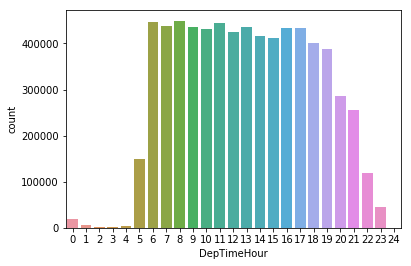

In [19]:
depTime_df = flights_df[~np.isnan(flights_df['DepTime'])]
depTime_df['DepTime'] = depTime_df['DepTime'].astype(int)
#!!! depTime_df = (flights_df['DepTime'].dropna() / 100).astype('int')

depTime_df['DepTimeHour'] = (depTime_df['DepTime'] / 100).astype(int)
sns.countplot(x=depTime_df['DepTimeHour'])

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

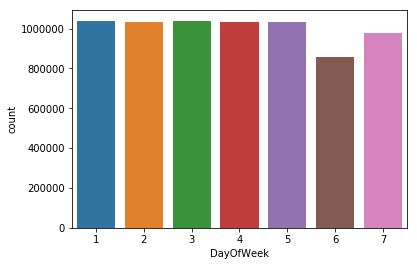

In [20]:
sns.countplot(x=flights_df['DayOfWeek'])

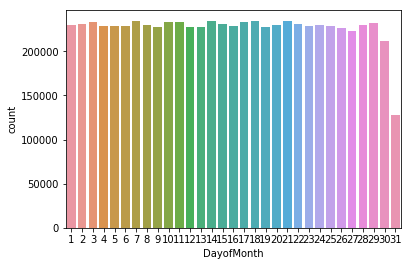

In [14]:
sns.countplot(x=flights_df['DayofMonth'])

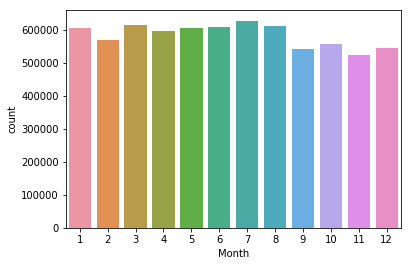

In [15]:
sns.countplot(x=flights_df['Month'])

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

D:\DiskD\Eldaniz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


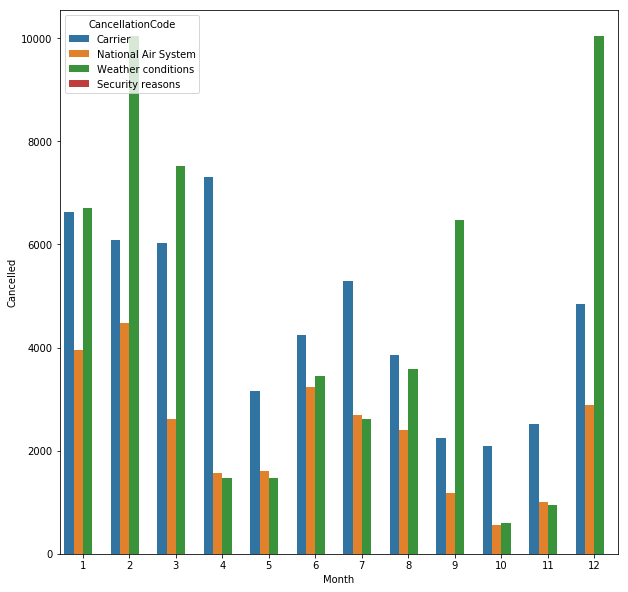

In [21]:
cancellation_df = flights_df[flights_df['CancellationCode'] != 'nan']
cancell_reasons = {'A' : 'Carrier', 'B': 'Weather conditions', 'C': 'National Air System', 'D': 'Security reasons'}
cancellation_df['CancellationCode'] = cancellation_df['CancellationCode'].map(cancell_reasons)
cancellation_df = cancellation_df.groupby(['Month', 'CancellationCode'])['Cancelled'].sum()
cancellation_df = cancellation_df.reset_index()

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=cancellation_df['Month'],
            y=cancellation_df['Cancelled'],
            hue=cancellation_df['CancellationCode'],
            data=cancellation_df,
            ax=ax)

In [17]:
cancellation_df.groupby('CancellationCode')['Cancelled'].sum()

CancellationCode
Carrier                54330.0
National Air System    28188.0
Security reasons          12.0
Weather conditions     54904.0
Name: Cancelled, dtype: float64

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

april

In [19]:
#!!!
flights_df.loc[flights_df['CancellationCode'] == 'A', 'Month'].value_counts()

4     7312
1     6635
2     6090
3     6038
7     5292
12    4850
6     4251
8     3852
5     3157
11    2510
9     2246
10    2097
Name: Month, dtype: int64

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [20]:
cancellation4_df = flights_df[flights_df['CancellationCode'] == 'A']
cancellation4_df.groupby('UniqueCarrier')['Cancelled'].sum().sort_values(ascending=False)[:1]
#!!! flights_df.loc[(flights_df['CancellationCode'] == 'A') & (flights_df['Month'] == 4),
#!!!               'UniqueCarrier'].value_counts().head()

UniqueCarrier
AA    9609.0
Name: Cancelled, dtype: float64

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

UniqueCarrier    AQ
ArrMedian        10
DepMedian         8
Name: 2, dtype: object

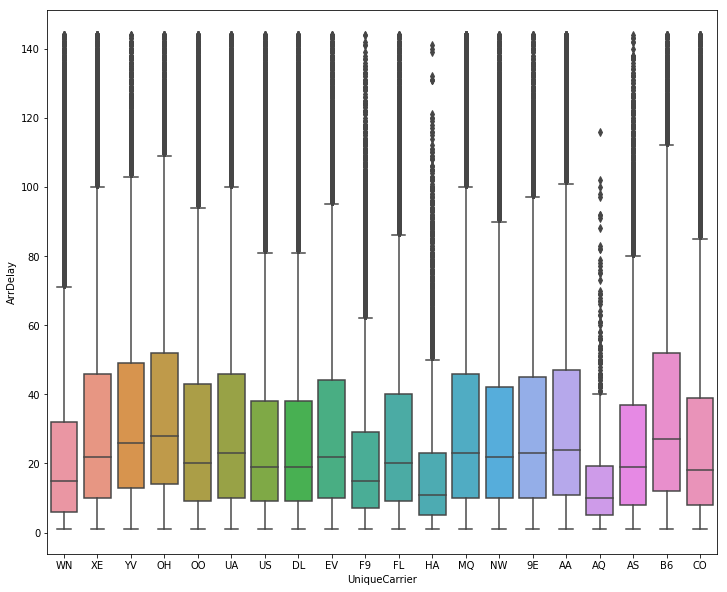

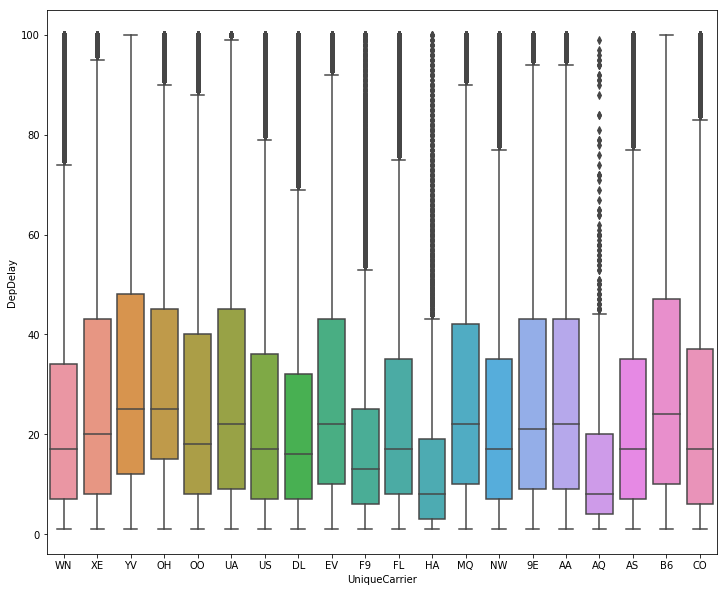

In [22]:
arr_dep_delays_df = flights_df[(flights_df['ArrDelay'] > 0) & (flights_df['DepDelay'] > 0)]
arr_dep_delays_df = arr_dep_delays_df[arr_dep_delays_df.ArrDelay < arr_dep_delays_df.ArrDelay.quantile(.95)]
arr_dep_delays_df = arr_dep_delays_df[arr_dep_delays_df.DepDelay < arr_dep_delays_df.DepDelay.quantile(.95)]
arr_dep_delays_df=arr_dep_delays_df.reset_index()

# box plot
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(
        x='UniqueCarrier',
        y='ArrDelay',
        data=arr_dep_delays_df,
        ax=ax
        )
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(
        x='UniqueCarrier',
        y='DepDelay',
        data=arr_dep_delays_df,
        ax=ax
        )

arr_dep_delays_df = arr_dep_delays_df.groupby('UniqueCarrier')['ArrDelay', 'DepDelay'].agg(['median'])
arr_dep_delays_df = arr_dep_delays_df.reset_index()
arr_dep_delays_df.columns = ['UniqueCarrier', 'ArrMedian', 'DepMedian']
arr_dep_delays_df.iloc[arr_dep_delays_df['DepMedian'].idxmin()]